In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#image = cv2.imread('15.jpg')
image = cv2.imread('16.png')

In [2]:
def show_image(title, image, cmap=None):
    plt.figure(figsize=(6, 6))
    if len(image.shape) == 2:
        plt.imshow(image, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

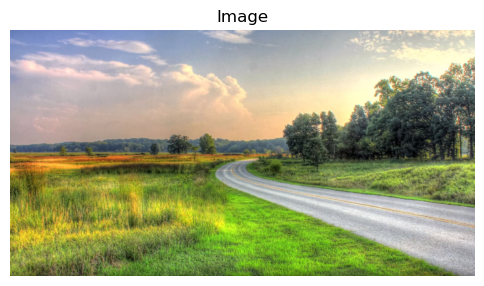

In [3]:
show_image('Image',image)

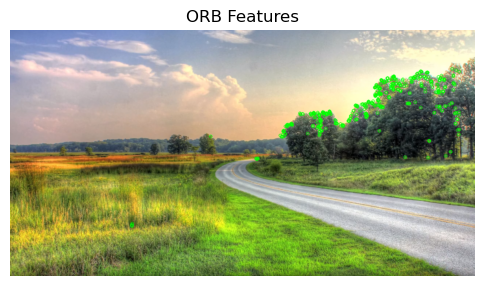

In [4]:
# 1. Найти все ORB features точки на изображении
orb = cv2.ORB_create()
keypoints_orb, descriptors_orb = orb.detectAndCompute(image, None)
image_orb = cv2.drawKeypoints(image, keypoints_orb, None, color=(0, 255, 0))
show_image('ORB Features', image_orb)

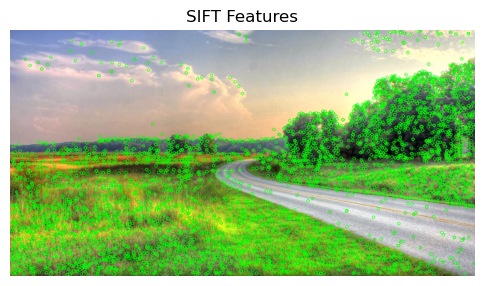

In [5]:
# 2. Найти все SIFT features точки на изображении
sift = cv2.SIFT_create()
keypoints_sift, descriptors_sift = sift.detectAndCompute(image, None)
image_sift = cv2.drawKeypoints(image, keypoints_sift, None, color=(0, 255, 0))
show_image('SIFT Features', image_sift)

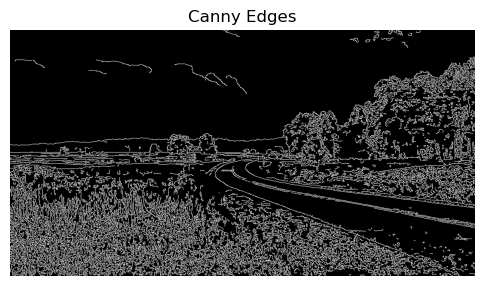

In [6]:
# 3. Найти Canny edges на изображении
edges = cv2.Canny(image, 100, 200)
show_image('Canny Edges', edges, cmap='gray')

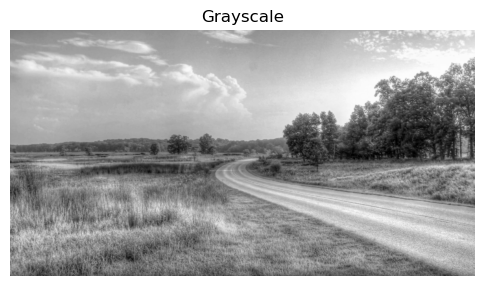

In [7]:
# 4. Перевести в grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
show_image('Grayscale', gray_image, cmap='gray')

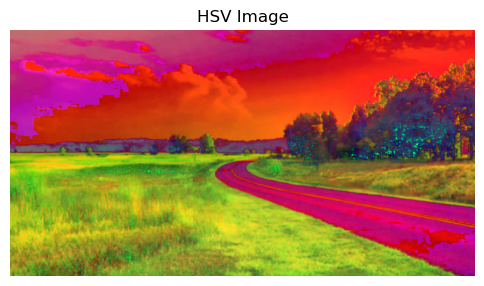

In [8]:
# 5. Перевести изображение в HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
show_image('HSV Image', hsv_image)

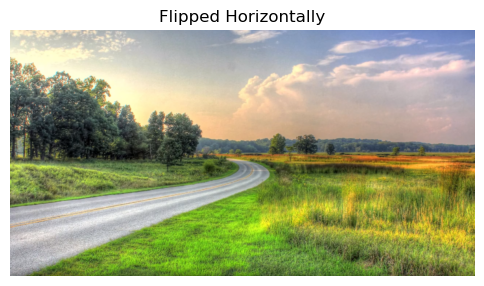

In [9]:
# 6. Отразить изображение по правой границе
flipped_horizontally = cv2.flip(image, 1)
show_image('Flipped Horizontally', flipped_horizontally)

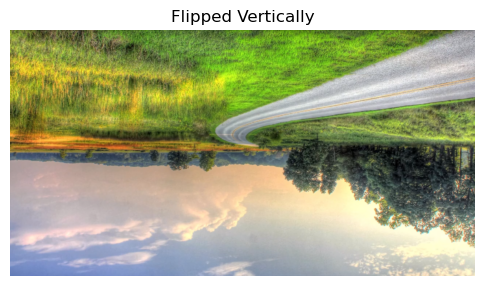

In [10]:
# 7. Отразить изображение по нижней границе
flipped_vertically = cv2.flip(image, 0)
show_image('Flipped Vertically', flipped_vertically)

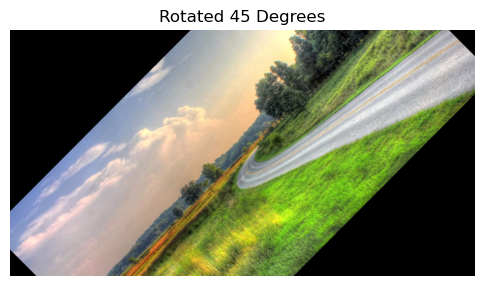

In [11]:
# 8. Повернуть изображение на 45 градусов
(h, w) = image.shape[:2]
center = (w // 2, h // 2)
matrix = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated_image = cv2.warpAffine(image, matrix, (w, h))
show_image('Rotated 45 Degrees', rotated_image)

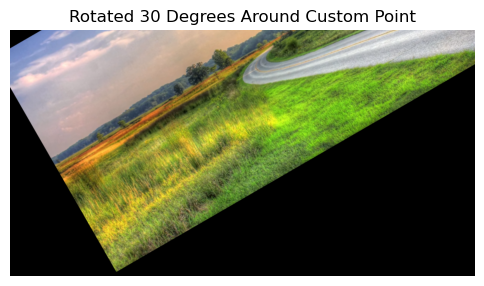

In [12]:
# 9. Повернуть изображение на 30 градусов вокруг заданной точки
center_custom = (100, 100)
matrix_custom = cv2.getRotationMatrix2D(center_custom, 30, 1.0)
rotated_custom_image = cv2.warpAffine(image, matrix_custom, (w, h))
show_image('Rotated 30 Degrees Around Custom Point', rotated_custom_image)

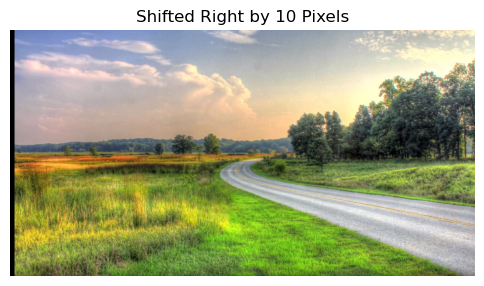

In [13]:
# 10. Сместить изображение на 10 пикселей вправо
shift_matrix = np.float32([[1, 0, 10], [0, 1, 0]])
shifted_image = cv2.warpAffine(image, shift_matrix, (w, h))
show_image('Shifted Right by 10 Pixels', shifted_image)

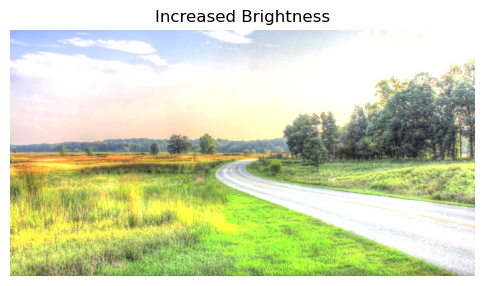

In [14]:
# 11. Изменить яркость изображения
bright_image = cv2.convertScaleAbs(image, alpha=1.2, beta=30)
show_image('Increased Brightness', bright_image)

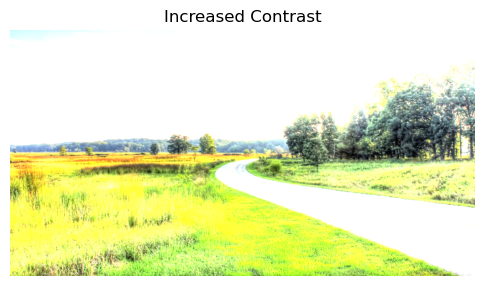

In [15]:
# 12. Изменить контраст изображения
contrast_image = cv2.convertScaleAbs(image, alpha=2.0, beta=0)
show_image('Increased Contrast', contrast_image)

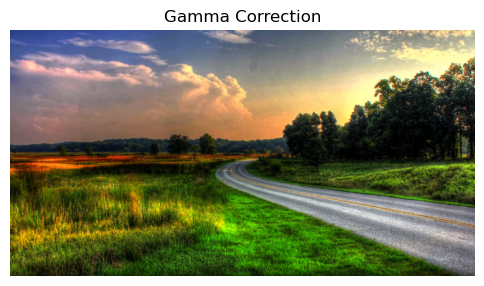

In [16]:
# 13. Сделать гамма-преобразование
gamma = 2.0
gamma_corrected = np.array(255 * (image / 255) ** gamma, dtype='uint8')
show_image('Gamma Correction', gamma_corrected)

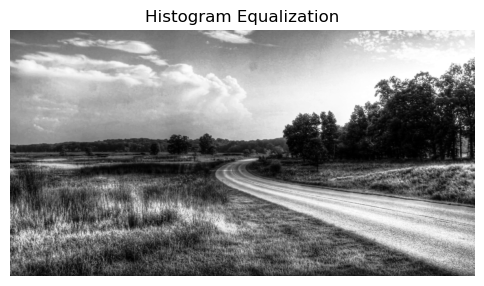

In [17]:
# 14. Сделать гистограмму эквализации
equalized_image = cv2.equalizeHist(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY))
show_image('Histogram Equalization', equalized_image, cmap='gray')

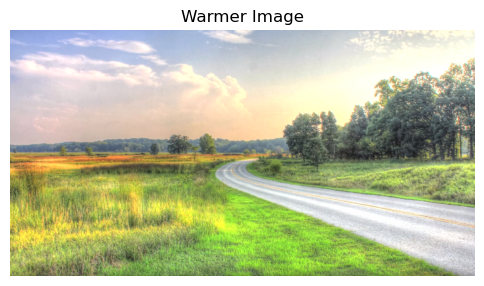

In [18]:
# 15. Изменить баланс белого, сделать более "теплую" картинку
warmer_image = cv2.convertScaleAbs(image, alpha=1, beta=30)
show_image('Warmer Image', warmer_image)

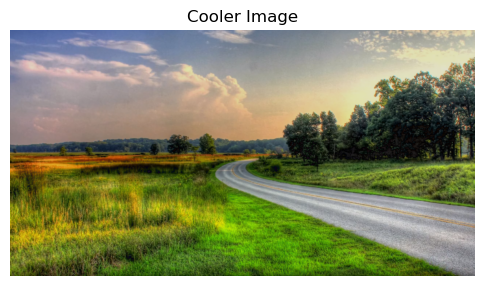

In [19]:
# 16. Изменить баланс белого, сделать более "холодную" картинку
cooler_image = cv2.convertScaleAbs(image, alpha=1, beta=-30)
show_image('Cooler Image', cooler_image)

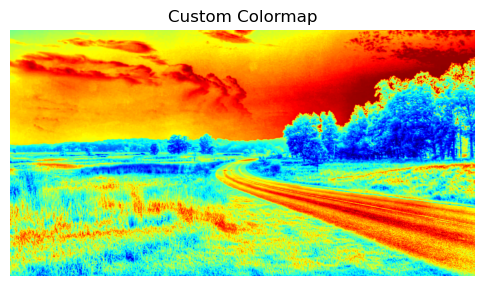

In [20]:
# 17. Изменить цветовую палитру по заданному шаблону
custom_colormap = cv2.applyColorMap(image, cv2.COLORMAP_JET)
show_image('Custom Colormap', custom_colormap)

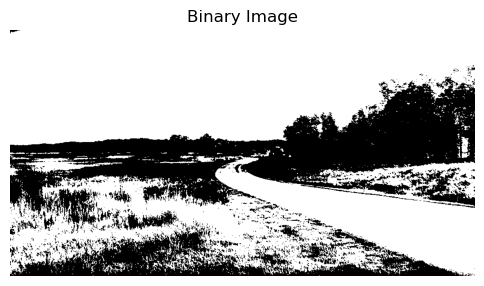

In [21]:
# 18. Сделать бинаризацию изображения
_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
show_image('Binary Image', binary_image, cmap='gray')

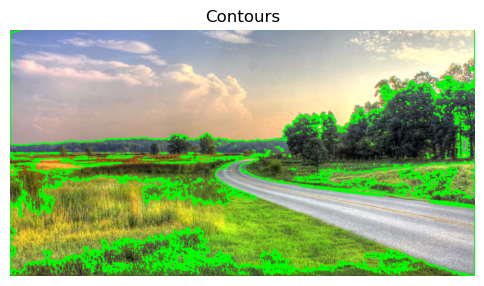

In [22]:
# 19. Найти контуры на бинаризованном изображении
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contour_image = cv2.drawContours(image.copy(), contours, -1, (0, 255, 0), 2)
show_image('Contours', contour_image)

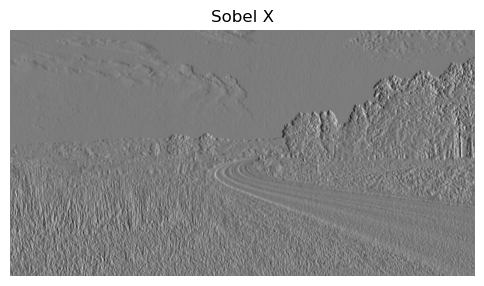

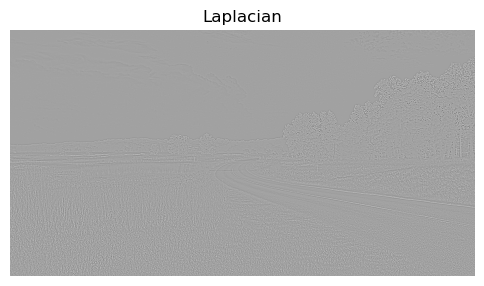

In [23]:
# 20. Найти контуры на изображении, применив фильтры (Собеля или Лаплассиан)
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=5)
show_image('Sobel X', sobel_x, cmap='gray')
laplacian = cv2.Laplacian(gray_image, cv2.CV_64F)
show_image('Laplacian', laplacian, cmap='gray')

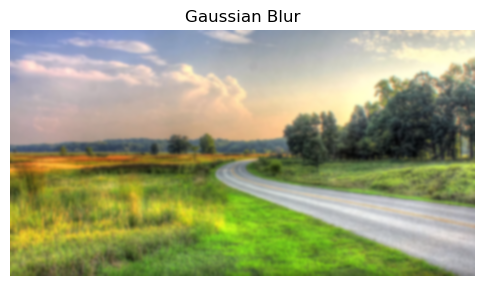

In [24]:
# 21. Сделать размытие изображения
blurred_image = cv2.GaussianBlur(image, (15, 15), 0)
show_image('Gaussian Blur', blurred_image)

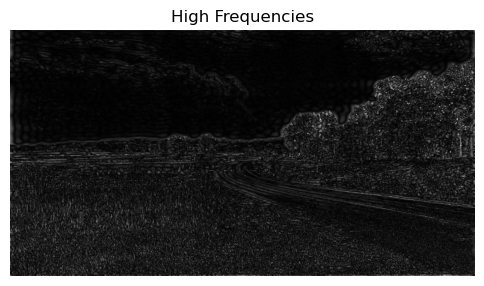

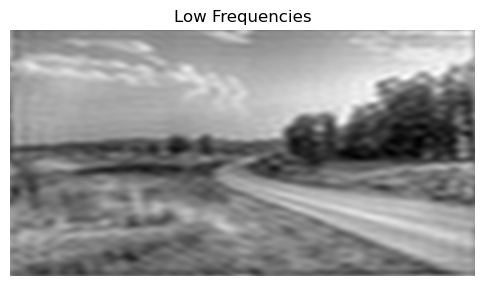

In [25]:
# 22 и 23. Фурье преобразование для быстрых и медленных частот
dft = cv2.dft(np.float32(gray_image), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
rows, cols = gray_image.shape
crow, ccol = rows // 2, cols // 2
r = 30

# Фильтрация для быстрых частот
mask = np.ones((rows, cols, 2), np.uint8)
mask[crow - r:crow + r, ccol - r:ccol + r] = 0
fshift = dft_shift * mask
f_ishift = np.fft.ifftshift(fshift)
filtered_image = cv2.idft(f_ishift)
filtered_image = cv2.magnitude(filtered_image[:, :, 0], filtered_image[:, :, 1])
show_image('High Frequencies', filtered_image, cmap='gray')

# Фильтрация для медленных частот
mask_slow = np.zeros((rows, cols, 2), np.uint8)
mask_slow[crow - r:crow + r, ccol - r:ccol + r] = 1
fshift_slow = dft_shift * mask_slow
f_ishift_slow = np.fft.ifftshift(fshift_slow)
filtered_image_slow = cv2.idft(f_ishift_slow)
filtered_image_slow = cv2.magnitude(filtered_image_slow[:, :, 0], filtered_image_slow[:, :, 1])
show_image('Low Frequencies', filtered_image_slow, cmap='gray')

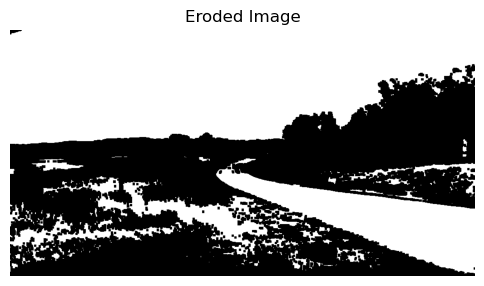

In [26]:
# 24. Применить операцию эрозии к изображению
kernel = np.ones((5, 5), np.uint8)
eroded_image = cv2.erode(binary_image, kernel, iterations=1)
show_image('Eroded Image', eroded_image, cmap='gray')

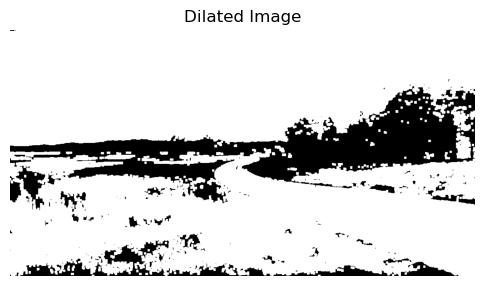

In [27]:
# 25. Применить операцию дилатации к изображению
dilated_image = cv2.dilate(binary_image, kernel, iterations=1)
show_image('Dilated Image', dilated_image, cmap='gray')